In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import pickle  
import os


In [34]:
#  Replace these with the actual file paths
file_path1 = "desk.csv" 
file_path2 = "cleaned_file.csv"  

#  Load CSV files and detect separator automatically
df1 = pd.read_csv(file_path1, sep=None, engine='python', encoding="utf-8")
df2 = pd.read_csv(file_path2, sep=None, engine='python', encoding="utf-8")

#  Ensure the first row is used as column headers
df1.columns = df1.iloc[0]
df2.columns = df2.iloc[0]
df1 = df1[1:].reset_index(drop=True)
df2 = df2[1:].reset_index(drop=True)

#  Remove extra spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# ✅ Print first few rows to confirm structure

df1.head()


,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1,0,...,0,0,0,17,2,0,2,0.117647,0,No
1,Female,Yes,Yes,13,12,12,0,12,1,0,...,4,0.114286,0,26,2,2,2,0.0769231,0.0769231,Yes
2,Female,No,Yes,7,6,6,0,6,1,0,...,4,0.114286,0,26,1,3,1,0.0384615,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,No
4,Female,No,Yes,8,4,4,0,4,1,0,...,1,25,0.05,26,2,2,2,0.0769231,0.0769231,No


In [35]:
df2.head()

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,Yes,No,7,6,6,0,6,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Female,Yes,No,7,7,7,0,7,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,Female,Yes,No,7,6,6,0,6,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Male,Yes,No,7,5,5,0,5,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,Male,Yes,No,7,8,6,2,8,0.75,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [36]:
df1.columns=df1.columns.str.lower()
df2.columns=df2.columns.str.lower()
print(df1.columns.tolist())
print(df2.columns.tolist())

['gender', 'nativelang', 'otherlang', 'age', 'clicks1', 'hits1', 'misses1', 'score1', 'accuracy1', 'missrate1', 'clicks2', 'hits2', 'misses2', 'score2', 'accuracy2', 'missrate2', 'clicks3', 'hits3', 'misses3', 'score3', 'accuracy3', 'missrate3', 'clicks4', 'hits4', 'misses4', 'score4', 'accuracy4', 'missrate4', 'clicks5', 'hits5', 'misses5', 'score5', 'accuracy5', 'missrate5', 'clicks6', 'hits6', 'misses6', 'score6', 'accuracy6', 'missrate6', 'clicks7', 'hits7', 'misses7', 'score7', 'accuracy7', 'missrate7', 'clicks8', 'hits8', 'misses8', 'score8', 'accuracy8', 'missrate8', 'clicks9', 'hits9', 'misses9', 'score9', 'accuracy9', 'missrate9', 'clicks10', 'hits10', 'misses10', 'score10', 'accuracy10', 'missrate10', 'clicks11', 'hits11', 'misses11', 'score11', 'accuracy11', 'missrate11', 'clicks12', 'hits12', 'misses12', 'score12', 'accuracy12', 'missrate12', 'clicks13', 'hits13', 'misses13', 'score13', 'accuracy13', 'missrate13', 'clicks14', 'hits14', 'misses14', 'score14', 'accuracy14', '

In [37]:
# # ✅ Print column names to check
# print("Columns in df1:", df1.columns.tolist())
# print("Columns in df2:", df2.columns.tolist())

# # ✅ Check if 'Dyslexia' exists
# print("Dyslexia in df1:", "Dyslexia" in df1.columns)
# print("Dyslexia in df2:", "Dyslexia" in df2.columns)

# # 🚀 If 'Dyslexia' is missing, search for similar column names
# print([col for col in df1.columns if "dyslexia" in col.lower()])
# print([col for col in df2.columns if "dyslexia" in col.lower()])


In [38]:
df=pd.concat([df1,df2],ignore_index=True)
df

,gender,nativelang,otherlang,age,clicks1,hits1,misses1,score1,accuracy1,missrate1,...,score31,accuracy31,missrate31,clicks32,hits32,misses32,score32,accuracy32,missrate32,dyslexia
0,Male,No,Yes,7,10,10,0,10,1,0,...,0,0,0,17,2,0,2,0.117647,0,No
1,Female,Yes,Yes,13,12,12,0,12,1,0,...,4,0.114286,0,26,2,2,2,0.0769231,0.0769231,Yes
2,Female,No,Yes,7,6,6,0,6,1,0,...,4,0.114286,0,26,1,3,1,0.0384615,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,No
4,Female,No,Yes,8,4,4,0,4,1,0,...,1,25,0.05,26,2,2,2,0.0769231,0.0769231,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Male,Yes,No,17,13,13,0,13,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No
5035,Female,Yes,Yes,17,9,9,0,9,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No
5036,Male,Yes,Yes,17,10,10,0,10,1,0,...,35,0.11428571428571,0,27,3,2,27,0.11111111111111,0.074074074074074,No
5037,Female,Yes,Yes,17,11,11,0,11,1,0,...,35,0.11428571428571,0,26,4,0,26,0.15384615384615,0,No


In [39]:
df["accuracy29"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5039 entries, 0 to 5038
Series name: accuracy29
Non-Null Count  Dtype 
--------------  ----- 
3644 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [40]:
colums_29=[]
for name_col in df.columns.tolist():
    if "29" in name_col:
        colums_29.append(name_col)
print(colums_29)

['clicks29', 'hits29', 'misses29', 'score29', 'accuracy29', 'missrate29']


In [41]:
for colu in colums_29:
    filtered_df_yes = df[df['dyslexia'] == 'Yes']
    filtered_df_No = df[df['dyslexia'] == 'No']

    mode_yes_dyx = filtered_df_yes[colu].mode()[0]
    mode_No_dyx = filtered_df_No[colu].mode()[0]
    print(f"name of column : {colu} mode of yes is {mode_yes_dyx} and mode of no {mode_No_dyx}")
    
    # Fill missing values with the mode for each group
    df.loc[(df['dyslexia'] == 'Yes') & (df[colu].isnull()), colu] = mode_yes_dyx
    df.loc[(df['dyslexia'] == 'No') & (df[colu].isnull()), colu] = mode_No_dyx



name of column : clicks29 mode of yes is 26 and mode of no 26
name of column : hits29 mode of yes is 1 and mode of no 1
name of column : misses29 mode of yes is 1 and mode of no 1
name of column : score29 mode of yes is 1 and mode of no 1
name of column : accuracy29 mode of yes is 0 and mode of no 0
name of column : missrate29 mode of yes is 0 and mode of no 0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Columns: 197 entries, gender to dyslexia
dtypes: object(197)
memory usage: 7.6+ MB


In [43]:
df[colums_29].isnull().sum()

0
clicks29      0
hits29        0
misses29      0
score29       0
accuracy29    0
missrate29    0
dtype: int64

In [44]:
df.isnull().sum()

0
gender          0
nativelang      0
otherlang       0
age             0
clicks1         0
             ... 
misses32      897
score32       897
accuracy32    896
missrate32    896
dyslexia        0
Length: 197, dtype: int64

In [45]:
for col in df.columns:
    # Calculate the mode of the column
    mode_value = df[col].mode()[0] if not df[col].mode().empty else None
    
    # Fill null values with the mode
    df[col].fillna(mode_value, inplace=True)

C:\Users\Mo\AppData\Local\Temp\ipykernel_17376\3142306559.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


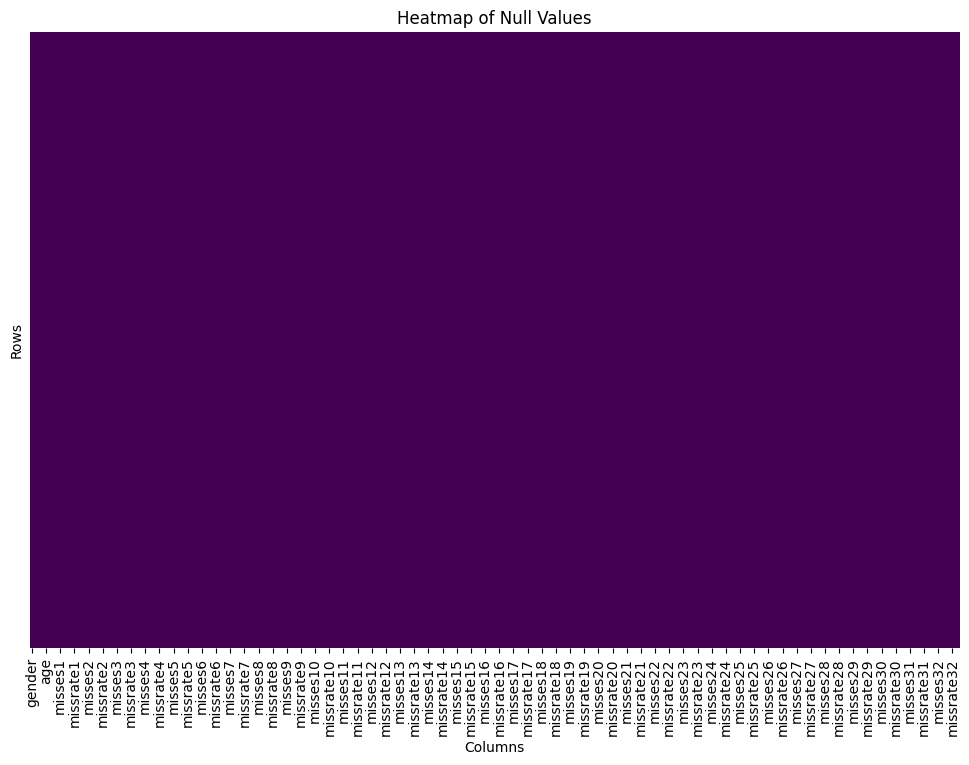

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and labels
plt.title('Heatmap of Null Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

In [47]:
df['dyslexia'] = df['dyslexia'].map({'Yes': 1, 'No': 0})


In [48]:
# Check class distribution
dyslexia_counts_df1 = df['dyslexia'].value_counts(normalize=True)
print(dyslexia_counts_df1)

dyslexia
0    0.892836
1    0.107164
Name: proportion, dtype: float64


C:\Users\Mo\AppData\Local\Temp\ipykernel_17376\2024686631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dyslexia_counts_df1.index, y=dyslexia_counts_df1.values, palette="Blues")


Text(0, 0.5, 'Proportion')

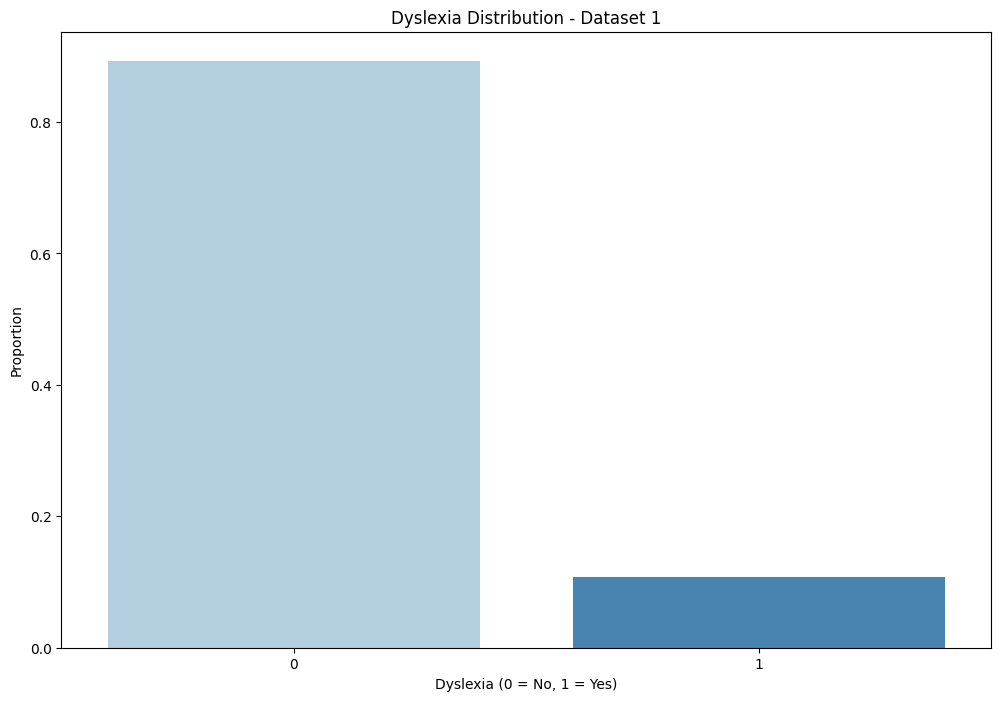

In [49]:
plt.figure(figsize=(12, 8))

sns.barplot(x=dyslexia_counts_df1.index, y=dyslexia_counts_df1.values, palette="Blues")
plt.title("Dyslexia Distribution - Dataset 1")
plt.xlabel("Dyslexia (0 = No, 1 = Yes)")
plt.ylabel("Proportion")

Balance data


In [50]:
from collections import Counter

print("Original Class Distribution in df:", Counter(df['dyslexia']))


Original Class Distribution in df: Counter({0: 4499, 1: 540})


In [51]:
df.head()  


,gender,nativelang,otherlang,age,clicks1,hits1,misses1,score1,accuracy1,missrate1,...,score31,accuracy31,missrate31,clicks32,hits32,misses32,score32,accuracy32,missrate32,dyslexia
0,Male,No,Yes,7,10,10,0,10,1,0,...,0,0,0,17,2,0,2,0.117647,0,0
1,Female,Yes,Yes,13,12,12,0,12,1,0,...,4,0.114286,0,26,2,2,2,0.0769231,0.0769231,1
2,Female,No,Yes,7,6,6,0,6,1,0,...,4,0.114286,0,26,1,3,1,0.0384615,0.115385,0
3,Female,No,Yes,7,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Female,No,Yes,8,4,4,0,4,1,0,...,1,25,0.05,26,2,2,2,0.0769231,0.0769231,0


In [52]:
df = pd.get_dummies(df, columns=["gender", "nativelang", "otherlang"], drop_first=True)
df

,age,clicks1,hits1,misses1,score1,accuracy1,missrate1,clicks2,hits2,misses2,...,clicks32,hits32,misses32,score32,accuracy32,missrate32,dyslexia,gender_Male,nativelang_Yes,otherlang_Yes
0,7,10,10,0,10,1,0,5,5,0,...,17,2,0,2,0.117647,0,0,True,False,True
1,13,12,12,0,12,1,0,11,11,0,...,26,2,2,2,0.0769231,0.0769231,1,False,True,True
2,7,6,6,0,6,1,0,6,6,0,...,26,1,3,1,0.0384615,0.115385,0,False,False,True
3,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,False,False,True
4,8,4,4,0,4,1,0,8,8,0,...,26,2,2,2,0.0769231,0.0769231,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,17,13,13,0,13,1,0,13,13,0,...,26,4,0,26,0.15384615384615,0,0,True,True,False
5035,17,9,9,0,9,1,0,10,10,0,...,26,4,0,26,0.15384615384615,0,0,False,True,True
5036,17,10,10,0,10,1,0,10,10,0,...,27,3,2,27,0.11111111111111,0.074074074074074,0,True,True,True
5037,17,11,11,0,11,1,0,11,11,0,...,26,4,0,26,0.15384615384615,0,0,False,True,True


In [53]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = df.drop(columns=["dyslexia"])
y = df["dyslexia"]

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))


After SMOTE: Counter({0: 4499, 1: 2249})


In [54]:
print("Missing values in df1_clean:\n", df.isnull().sum())


Missing values in df1_clean:
 age               0
clicks1           0
hits1             0
misses1           0
score1            0
                 ..
missrate32        0
dyslexia          0
gender_Male       0
nativelang_Yes    0
otherlang_Yes     0
Length: 197, dtype: int64


feature selection


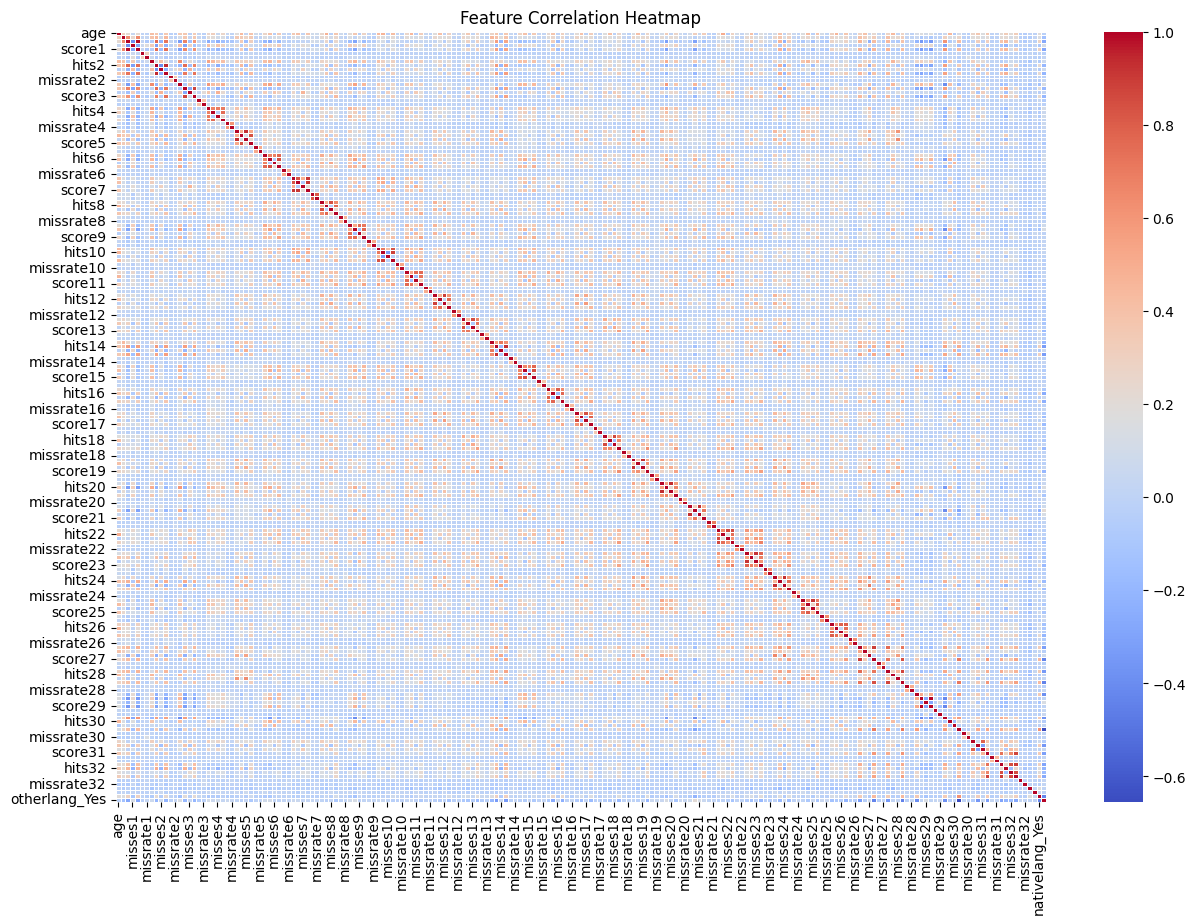

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


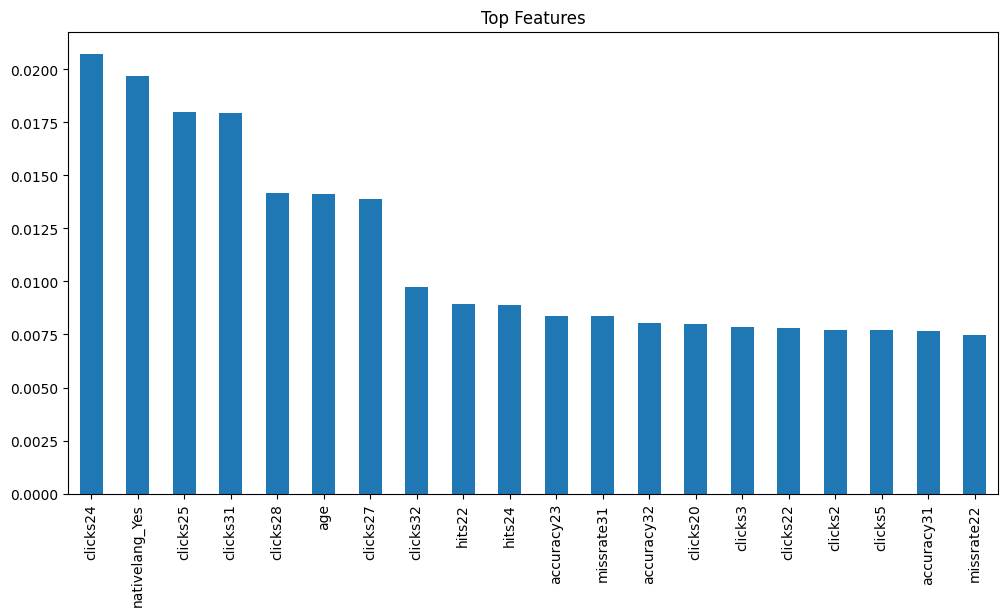

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train a simple model to get feature importance
X = df.drop(columns=["dyslexia"])
y = df["dyslexia"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(12, 6), title="Top Features")
plt.show()


In [57]:
# # List of selected top features
# selected_features = ["Clicks28", "Age", "Clicks25", "Clicks31", "Clicks24", 
#                      "Clicks27", "Clicks32", "Missrate31", "Clicks30", 
#                      "Accuracy31", "Accuracy32", "Missrate32", "Score25", 
#                      "Hits28", "Hits25", "Score10", "Hits14", "Hits2", "Hits10"]

# # Select only these features for training
# X_selected = df1_clean[selected_features]
# y = df1_clean["Dyslexia"]


In [58]:
len(X_resampled)

6748

In [59]:
# Import classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
# Import Gaussian NB Classification models
from sklearn.naive_bayes import GaussianNB
# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score


from sklearn.ensemble import VotingClassifier

In [60]:
bagging_clf = BaggingClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
perceptron_clf = Perceptron(random_state=42)
svc_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier()
logistic_clf=LogisticRegression()
GaussianNB_clf=GaussianNB()
ExtraTrees_clf=ExtraTreesClassifier()
GradientBoostingClassifier_clf=GradientBoostingClassifier()
LinearDiscriminantAnalysis_clf=LinearDiscriminantAnalysis()
AdaBoostClassifier_clf=AdaBoostClassifier()

In [61]:
# List of classifiers
classifiers = [
    ('Bagging', bagging_clf),
    ('Random Forest', rf_clf),
    ('Decision Tree', dt_clf),
    ('Perceptron', perceptron_clf),
    ('SVC', svc_clf),
    ('KNN', knn_clf),
    ('logistic Regression',logistic_clf),
    ('Gaussian NB',GaussianNB_clf),
    ('ExtraTreesClassifier',ExtraTrees_clf),
    ('GradientBoostingClassifier',GradientBoostingClassifier_clf),
    ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis_clf),
    ('AdaBoostClassifier',AdaBoostClassifier_clf)
]

In [62]:
dicDataFrame={
    'Classifier Name':[],
    'Accuracy':[]
}
Maxaccuracy=20
ListMax_accuracy=[]
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.2f}")

    # Calculate recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.2f}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.2f}")
    dicDataFrame['Classifier Name'].append(clf_name)
    dicDataFrame['Accuracy'].append(accuracy)
    if accuracy > Maxaccuracy :
        Maxaccuracy=accuracy
        ListMax_accuracy=[(clf_name,clf)]
DataFrame=pd.DataFrame(dicDataFrame)
DataFrame.loc[-1]=[ListMax_accuracy[0],Maxaccuracy]
#display(DataFrame)
#print(f"Max accuracy :{Maxaccuracy} , classifier of max accuracy : {ListMax_accuracy}")

NameError: name 'X_train' is not defined

In [ ]:
DataFrame.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index([0,1,2,3,4,5,6,7,8,9,10,11,'Max Accuracy'], axis=0)

,CLASSIFIER NAME,ACCURACY
0,Bagging,"92,000"
1,Random Forest,"94,370"
2,Decision Tree,"88,000"
3,Perceptron,"76,519"
4,SVC,"72,593"
5,KNN,"79,259"
6,logistic Regression,"80,963"
7,Gaussian NB,"52,074"
8,ExtraTreesClassifier,"95,630"
9,GradientBoostingClassifier,"92,889"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression
ExtraTrees_clf=ExtraTreesClassifier()

# Train the model
ExtraTrees_clf.fit(X_train, y_train)

# Make predictions
y_pred = ExtraTrees_clf.predict(X_test)

# Evaluate the model
print("randomforest testing Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

randomforest testing Accuracy: 0.9585185185185185
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       921
           1       0.95      0.92      0.93       429

    accuracy                           0.96      1350
   macro avg       0.95      0.95      0.95      1350
weighted avg       0.96      0.96      0.96      1350



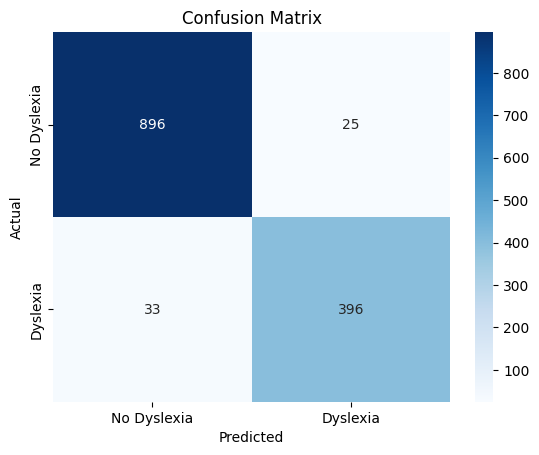

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Dyslexia", "Dyslexia"], yticklabels=["No Dyslexia", "Dyslexia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


improve model


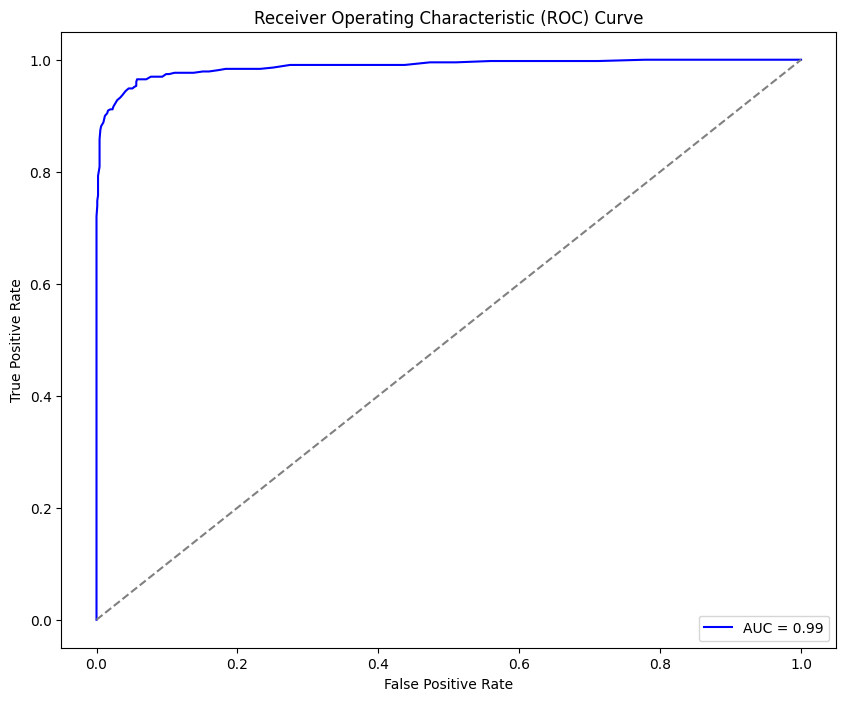

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, ExtraTrees_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
os.makedirs("Saved_Model_Status",exist_ok=True)


In [ ]:
with open('Saved_Model_Status/beforeSelectedColumns_ExtraTreesClassifier','wb') as file: 
    pickle.dump(ExtraTrees_clf,file) 
    print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
# with open(path, 'rb') as file:
#     pickle.load(file)

In [ ]:
print(list(X.columns))

['age', 'clicks1', 'hits1', 'misses1', 'score1', 'accuracy1', 'missrate1', 'clicks2', 'hits2', 'misses2', 'score2', 'accuracy2', 'missrate2', 'clicks3', 'hits3', 'misses3', 'score3', 'accuracy3', 'missrate3', 'clicks4', 'hits4', 'misses4', 'score4', 'accuracy4', 'missrate4', 'clicks5', 'hits5', 'misses5', 'score5', 'accuracy5', 'missrate5', 'clicks6', 'hits6', 'misses6', 'score6', 'accuracy6', 'missrate6', 'clicks7', 'hits7', 'misses7', 'score7', 'accuracy7', 'missrate7', 'clicks8', 'hits8', 'misses8', 'score8', 'accuracy8', 'missrate8', 'clicks9', 'hits9', 'misses9', 'score9', 'accuracy9', 'missrate9', 'clicks10', 'hits10', 'misses10', 'score10', 'accuracy10', 'missrate10', 'clicks11', 'hits11', 'misses11', 'score11', 'accuracy11', 'missrate11', 'clicks12', 'hits12', 'misses12', 'score12', 'accuracy12', 'missrate12', 'clicks13', 'hits13', 'misses13', 'score13', 'accuracy13', 'missrate13', 'clicks14', 'hits14', 'misses14', 'score14', 'accuracy14', 'missrate14', 'clicks15', 'hits15', 'm